## Grafs 23/24 - Sheet 3 - Due 8 November 2023


# Bipartite graphs, trees and search 


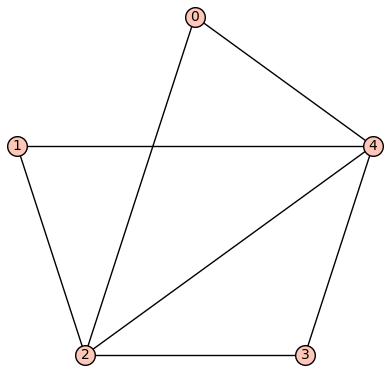

[2, 4]

In [5]:
G=graphs.CompleteGraph(5)
G.delete_edges([(0,1),(0,3),(1,3)])
G.show()
G.neighbors(1) 

## Exercise 1

Write your own breadth first search algorithm. The function `BFS(G,v)` should return the tree `T` (as a sage Graph) obtained by performing the breadth first search on the graph `G` with root `v`, as well as a list `L` that records the order in which the vertices are visited. You might use a python `set` to store the visited vertices. You can use a `list` and `pop(0)` to model a first-in-first-out queue.

In [6]:
A=set([1,2,3])

print(A)

A.add(4)

print(A)

if 3 in A:
    print('A contains 3')
else:
    print('A does not contain 3')
    
if 5 in A:
    print('A contains 5')
else:
    print('A does not contain 5')


{1, 2, 3}
{1, 2, 3, 4}
A contains 3
A does not contain 5


In [7]:
L=list([1,2,3,4,5])
print(L)
a=L.pop(0)
print(L)
print(a)
L.append(6)
print(L)
a=L.pop(0)
print(L)
print(a)

[1, 2, 3, 4, 5]
[2, 3, 4, 5]
1
[2, 3, 4, 5, 6]
[3, 4, 5, 6]
2


In [8]:
def BFS(G,v):
    T=Graph()
    #This Graph will contain the spanning tree
    L=[]
    #This list will contain the vertices in the order they are visited
    
    #
    #Complete here the code for Exercise 1
    mark = set([v])
    todo = [v]
    
    while len(todo) != 0 :
        w = todo.pop(0)
        L.append(w)
        for u in G.neighbors(w) :
            if u not in mark :
                T.add_edge((u, w))
                mark.add(u)
                todo.append(u)
        
    return (T,L)
    

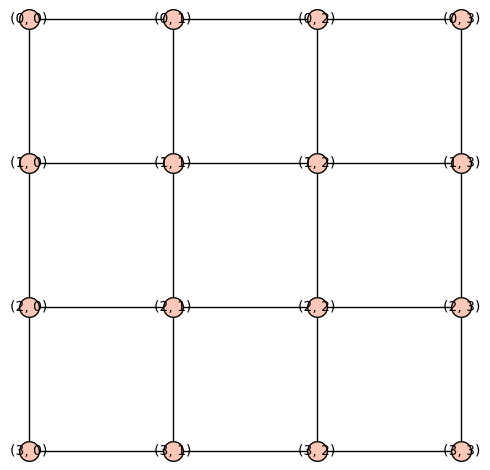

[(0, 0), (0, 1), (1, 0), (0, 2), (1, 1), (2, 0), (0, 3), (1, 2), (2, 1), (3, 0), (1, 3), (2, 2), (3, 1), (2, 3), (3, 2), (3, 3)]


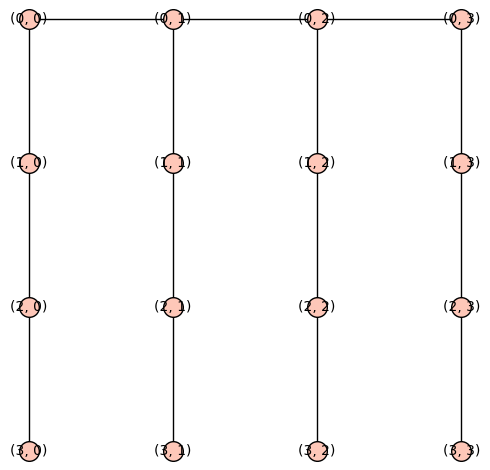

[(1, 1), (0, 1), (1, 0), (1, 2), (2, 1), (0, 0), (0, 2), (2, 0), (1, 3), (2, 2), (3, 1), (0, 3), (3, 0), (2, 3), (3, 2), (3, 3)]


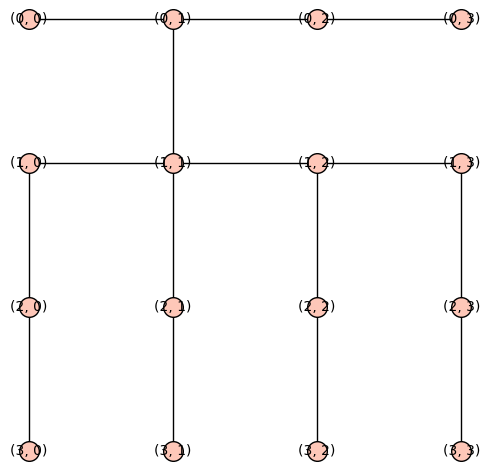

In [9]:
Gr=graphs.Grid2dGraph(4,4)
Gr.plot(save_pos=True).show()
pos=Gr.get_pos()
v=Gr.vertices()[0]
print(BFS(Gr,v)[1])
H=BFS(Gr,v)[0]
H.plot(pos=pos).show()

v=Gr.vertices()[5]
print(BFS(Gr,v)[1])
H=BFS(Gr,v)[0]
H.plot(pos=pos).show()


## Exercice 2

Write a function `connected_components(G)` that uses BFS to compute the connected components of a graph `G`. It should return a list of connected components (as sets of vertices).

In [10]:
def connected_components(G):

    CC=[]
    #this list will contain the connected components of G

    #
    #Complete here the code for Exercise 2
    #            
    
    while G.size() != 0 :
        v = G.vertices()[0]
        _, C = BFS(G, v)
        
        CC += [C]
        G.delete_vertices(C)
    
    return CC
                
                    

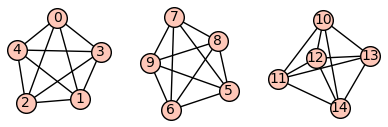

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14]]

In [11]:
G1=graphs.CompleteGraph(5)
G1.relabel(range(5))
G2=graphs.CompleteGraph(5)
G2.relabel(range(5,10))
G3=graphs.CompleteGraph(5)
G3.relabel(range(10,15))
DG=G1.union(G2).union(G3)
DG.show()

connected_components(DG)

## Exercice 3
Write a function `distance(G,v)` that adapts the BFS algorithm to return a list containing the length of the shortest path between the vertices `v` and `w` for each vertex `w`. If these vertices are not connected then the algorithm should return 'Infinity'. (You need to import this via `from sage.rings.infinity import Infinity`). You can assume that the vertices of the graph `G` are the integers between `0` and some number `n`.



In [12]:
from sage.rings.infinity import Infinity

def distance(G,v):
    dist=[Infinity for i in range(G.order())]
    dist[v]=0
    #dist will contain the distances of all the vertices to v
    
    #
    #Complete here the code for Exercise 3
    #           
    mark = set([v])
    todo = [v]
    
    while len(todo) != 0 :
        w = todo.pop(0)
        for u in G.neighbors(w) :
            if dist[w] + 1 < dist[u] :
                dist[u] = dist[w] + 1
                
            if u not in mark :
                todo.append(u)
                mark.add(u)
    
    return dist
    

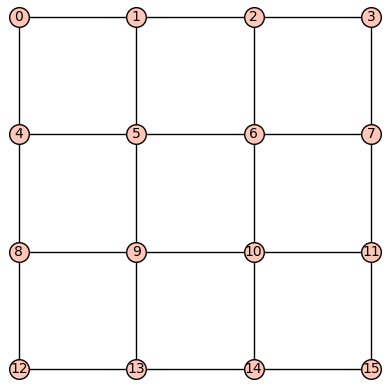

[0, 1, 2, 3, 1, 2, 3, 4, 2, 3, 4, 5, 3, 4, 5, 6]

In [13]:
Gr.relabel()
Gr.show()
distance(Gr,0)

{(0, 1, 0): [], (1/6, 5/6, 0): [], (1/3, 2/3, 0): [], (1/2, 1/2, 0): [], (2/3, 1/3, 0): [], (5/6, 1/6, 0): [], (1, 0, 0): []}


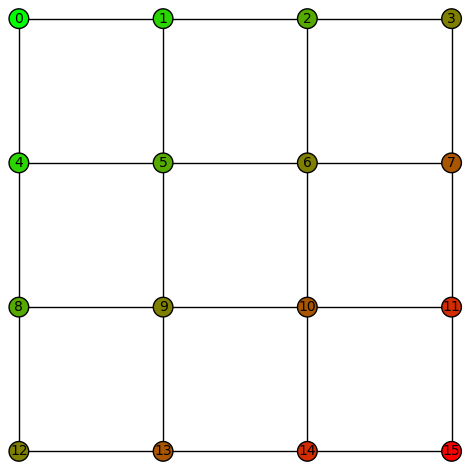

In [14]:
dists=distance(Gr,0)
diam =max(dists)

vertex_colors={}
for i in range(diam+1):
    vertex_colors[(i/diam,1-i/diam,0)]=[]

print(vertex_colors)

for v in Gr.vertices():
    vertex_colors[(dists[v]/diam,1-dists[v]/diam,0)].append(v)
    
pl=Gr.plot(vertex_colors=vertex_colors)
pl.show()

{(0, 1, 0): [], (1/4, 3/4, 0): [], (1/2, 1/2, 0): [], (3/4, 1/4, 0): [], (1, 0, 0): []}


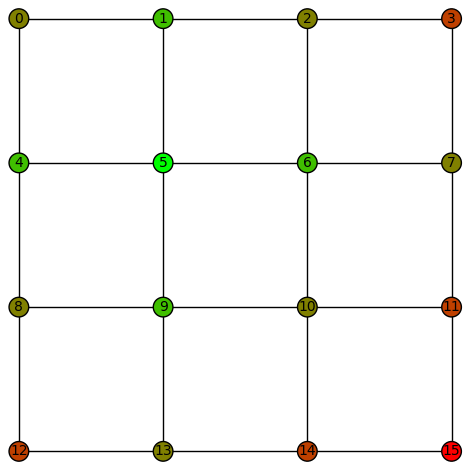

In [15]:
dists=distance(Gr,5)
diam =max(dists)

vertex_colors={}
for i in range(diam+1):
    vertex_colors[(i/diam,1-i/diam,0)]=[]

print(vertex_colors)

for v in Gr.vertices():
    vertex_colors[(dists[v]/diam,1-dists[v]/diam,0)].append(v)
    
pl=Gr.plot(vertex_colors=vertex_colors)
pl.show()

In [16]:
UG=Graph([[1,2],[3,4]])
distance(UG,1)

[+Infinity, 0, 1, +Infinity]

## Exercise 4

The _girth_ $g(G)$ of a graph $G$ is the length of a shortest cycle contained in $G$. 
Write a function `edge_girth(G,e)` that computes the length of a shortest cycle in `G` containing the edge `e`. (Hint: a shortest cycle using $e$ is composed of $e$ and a shortest path between its endpoints in $G\setminus e$.) 
If there is no cycle using this edge, the function should return `Infinity`. 

Write a function `girth(G)` that computes the girth of the graph `G`. 


In [21]:
def edge_girth(G,e):

    #
    #Complete here the code for Exercise 4
    #
    G.delete_edge(e)
    return distance(G, e[0])[e[1]] + 1


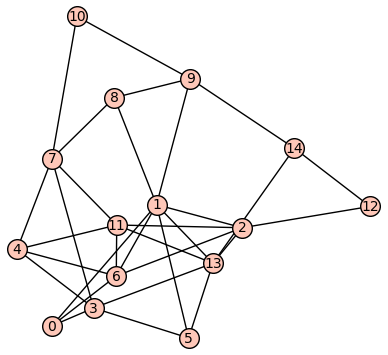

(0, 1, None)


3

In [24]:
G=graphs.RandomGNP(15,.25)
G.show()
print(G.edges()[0])
edge_girth(G, G.edges()[0])

In [23]:
P=graphs.PathGraph(4)
edge_girth(P,(1,2))

+Infinity

In [25]:
def girth(G):
    
    #
    #Complete here the code for Exercise 4
    # 
    g = min([ edge_girth(G, e) for e in G.edges() ])
     
    return g
    

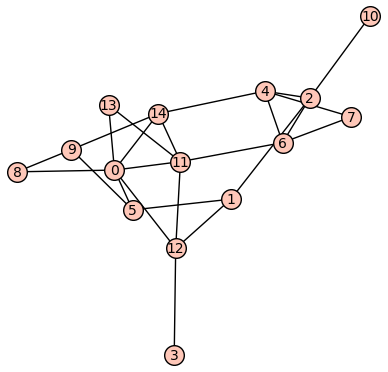

3

In [26]:
RG=graphs.RandomGNP(15,.18)

RG.show()

girth(RG)

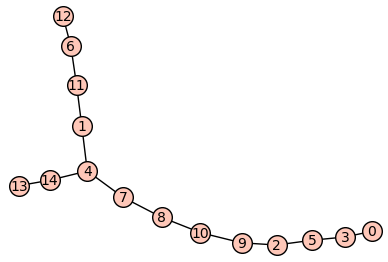

+Infinity

In [27]:
RT=graphs.RandomTree(15)

RT.show()

girth(RT)

## Exercise 5

Write your own depth first search algorith. The function `DFS(G,v)` should return the tree `T` (as a sage `Graph`) obtained by performing the depth first search on the graph `G` with root `v`, as well as a list `L` containing the vertices in the order in which they are visited by your DFS algorithm.

You can start by writing an auxiliary recursive function `recursiveDFS(G,v,T,L)` whose effect is to modify T and L.


In [28]:
def recursiveDFS(G,v,T,L):
    
    # You can define a recursive function that modifies T and L.
    L.append(v)
    for u in G.neighbors(v) :
        if u not in L :
            T.add_edge((u, v))
            T, L = recursiveDFS(G, u, T, L)
    
    return (T, L)

    
def DFS(G,v):
    T=Graph()  #This Graph will contain the spanning tree
    L=[]       #This list will contain the vertices in the order they are visited
    
    #
    #Complete here the code for Exercise 5
    #
    
    T, L = recursiveDFS(G, v, T, L)
    
    return (T,L)

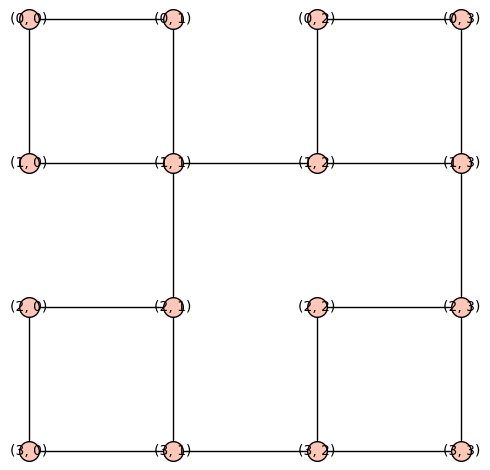

[(1, 1), (0, 1), (0, 0), (1, 0), (1, 2), (0, 2), (0, 3), (1, 3), (2, 3), (2, 2), (3, 2), (3, 1), (2, 1), (2, 0), (3, 0), (3, 3)]


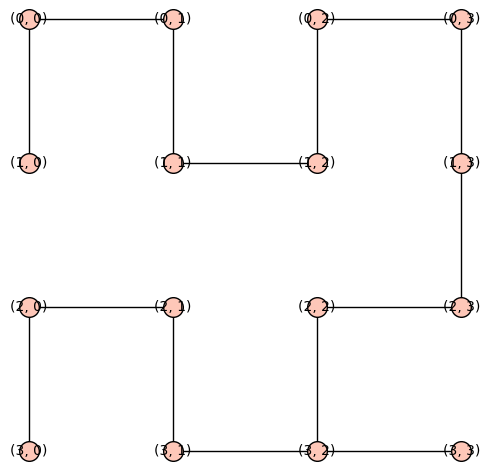

In [32]:
Gr=graphs.Grid2dGraph(4,4)
Gr.delete_edges([((0,1), (0, 2)), ((1, 0), (2, 0)), ((1, 2), (2, 2)), ((2, 1), (2, 2))])
Gr.plot(save_pos=True).show()
pos=Gr.get_pos()
v=Gr.vertices()[5]
print(DFS(Gr,v)[1])
H=DFS(Gr,v)[0]
H.plot(pos=pos).show()

## Exercise 6

Write a function `is_bipartite(G,bipartition=False)` that uses DFS to test whether a graph is bipartite. If `bipartition=False` the function should return a boolean `True` or `False`. If `bipartition=True`, then the function should return a pair `(b,P)`: if `G` is bipartite then `b=True` and `P=(A,B)` where `A` and `B` are a bipartition of the vertices, if `G` is not bipartite then `b=False` and `P=()`.

In [35]:
def is_bipartite(G, bipartition=False):
    bipartite=True
    #Bolean that will state whether G is bipartite
    P=(set(),set())
    #This will contain a bipartition if the graph is bipartite
    
    #
    #Complete here the code for Exercise 6
    # 
    v = G.vertices()[0]
    todo = [v]
    P[0].add(v)
    
    while len(todo) != 0 :
        w = todo.pop(0)
        for u in G.neighbors(w) :
            if u not in P[0] and u not in P[1] :
                todo.append(u)
                if w in P[0]:
                    P[1].add(u)
                else :
                    P[0].add(u)
            elif (u in P[0] and w in P[0]) or (u in P[1] and w in P[1]) :
                return False

    if bipartition:
        return (bipartite,P)
    else:
        return bipartite

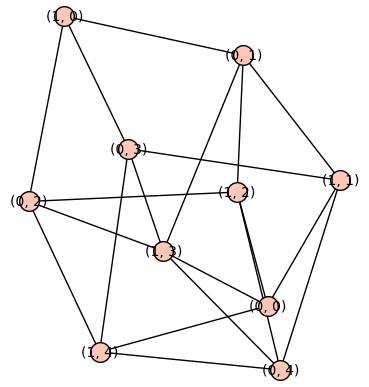

(True, ({(0, 1), (0, 4), (0, 0), (0, 3), (0, 2)}, {(1, 2), (1, 1), (1, 4), (1, 0), (1, 3)}))


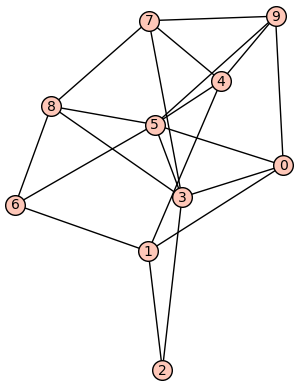

False


In [36]:
RB=graphs.RandomBipartite(5,5,.8)
RB.show()
print(is_bipartite(RB,bipartition=True))
RG=graphs.RandomGNM(10,RB.size())
RG.show()
print(is_bipartite(RG,bipartition=True))

## Exercise 7

Turn the proof of the theorem from the lecture stating that every loopless graph $G$ with $m$ edges contains bipartite subgraph $H$ with at least $\frac{m}{2}$ edges into a function `large_bipartite(G)` that returns a bipartite subgraph of `G` containing at least half its edges.

In [38]:
from typing import Tuple
def random_bipartition(G) -> Tuple[set, set]:
    P = (set(), set())
    
    v = G.vertices()[0]
    todo = [v]
    P[0].add(v)
    
    while len(todo) != 0 :
        w = todo.pop(0)
        for u in G.neighbors(w) :
            if u not in P[0] and u not in P[1] :
                todo.append(u)
                if w in P[0]:
                    P[1].add(u)
                else :
                    P[0].add(u)
    return P

def large_bipartite(G):
    
    #
    #Complete here the code for Exercise 7
    #
    
    # First we will generate a random bipartite graph from the original graph
    H = Graph()
    H.add_vertices(G.vertices())
    
    A, B = random_bipartition(G) 
    
    for a in A :
        H.add_edges([ (a, b) for b in set(G.neighbors(a)).intersection(B) ])
        
    # Now we will change the bipartition til we create a good enough one
    while H.num_edges() < G.num_edges() / 2 :
        for v in H.vertices() :
            Nv_A = set(G.neighbors(v)).intersection(A)
            Nv_B = set(G.neighbors(v)).intersection(B) 
            
            if len(Nv_A) < len(Nv_B) :
                if v in B :
                    B.remove(v)
                    A.add(v)
                    
                    H.delete_edges([ (v, a) for a in Nv_A ])
                    H.add_edges([ (v, b) for b in Nv_B ])
            elif len(Nv_B) < len(Nv_A) :
                if v in A :
                    A.remove(v)
                    B.add(v)
                    
                    H.delete_edges([ (v, b) for b in Nv_B ])
                    H.add_edges([ (v, a) for a in Nv_A ])
        
    return H
    

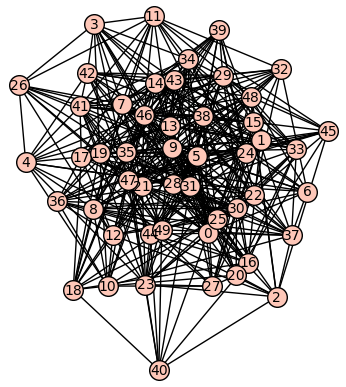

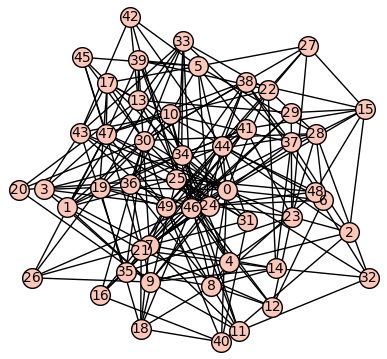

Is H bipartite? True
Does it have at least half of G edges? True


In [40]:
import random
G=graphs.RandomGNP(50,.3)
G.show()


H=large_bipartite(G)
H.show()
print("Is H bipartite?",H.is_bipartite())
print("Does it have at least half of G edges?", 2*H.num_edges()>=G.num_edges())